In [1]:
require(Boruta)
require(tidyverse)
require(caret)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



seed for reproducible result

In [2]:
set.seed(42)

In [3]:
test <- read.csv("./data/test.csv", stringsAsFactors = F)
train <- read.csv("./data/train.csv", stringsAsFactors = F)

In [4]:
head(train)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
glimpse(train)

Observations: 1,460
Variables: 81
$ Id            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ MSSubClass    <int> 60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20…
$ MSZoning      <chr> "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "…
$ LotFrontage   <int> 65, 80, 68, 60, 84, 85, 75, NA, 51, 50, 70, 85, NA, 91,…
$ LotArea       <int> 8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 61…
$ Street        <chr> "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave",…
$ Alley         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ LotShape      <chr> "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1",…
$ LandContour   <chr> "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl",…
$ Utilities     <chr> "AllPub", "AllPub", "AllPub", "AllPub", "AllPub", "AllP…
$ LotConfig     <chr> "Inside", "FR2", "Inside", "Corner", "FR2", "Inside", "…
$ LandSlope     <chr> "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl",…
$ Neighborhood  <c

In [6]:
df <- train
features <- names(df %>%
                  select(-c(Id, SalePrice))) 
response <- df$SalePrice
df <- df %>% select(features)
df <- df %>% mutate_if(is.numeric, replace_na, replace = -1) # missing numeric values
df <- df %>% mutate_if(is.character, replace_na, replace = '*MISS*') # missing cathegorical values

In [7]:
bor.results <- Boruta(df, response, maxRuns = 101, doTrace = 0) # feature selection based on random forest wrapper
selected_features <- getSelectedAttributes(bor.results, withTentative = F) # important features only
print(bor.results)

Boruta performed 100 iterations in 55.33135 secs.
 46 attributes confirmed important: BedroomAbvGr, BldgType, BsmtCond,
BsmtFinSF1, BsmtFinType1 and 41 more;
 21 attributes confirmed unimportant: BsmtFinSF2, BsmtHalfBath,
Condition2, EnclosedPorch, ExterCond and 16 more;
 12 tentative attributes left: Alley, BsmtExposure, BsmtFinType2,
Condition1, Electrical and 7 more;


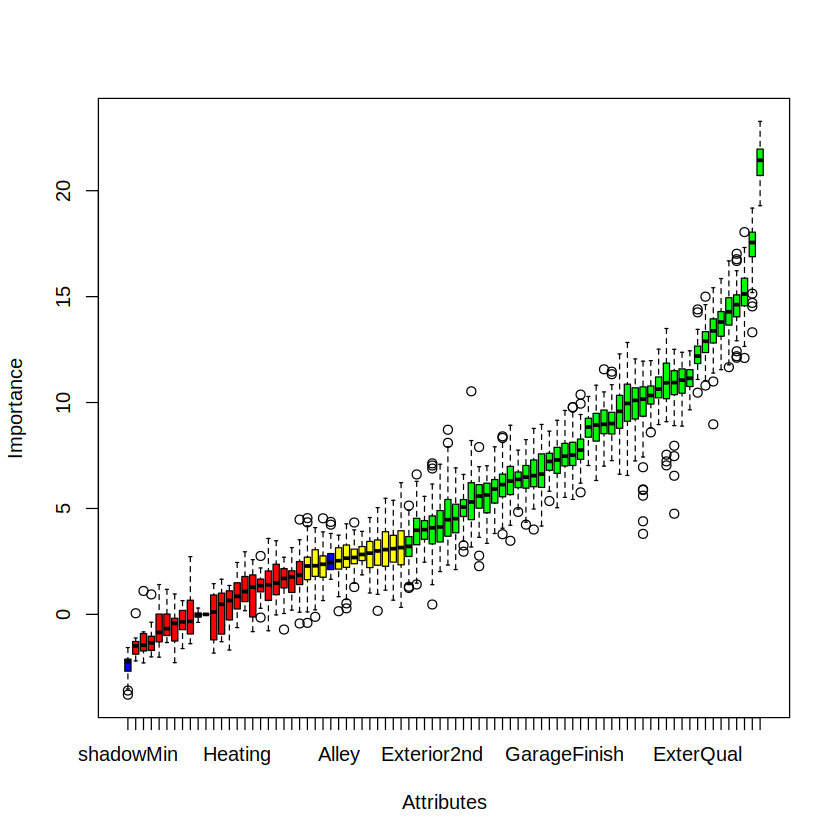

In [8]:
plot(bor.results) # green = important

In [9]:
arrange(cbind(attr = rownames(attStats(bor.results)), attStats(bor.results)), desc(medianImp))

attr,meanImp,medianImp,minImp,maxImp,normHits,decision
GrLivArea,21.343885,21.435069,19.290512,23.274244,1,Confirmed
OverallQual,17.381575,17.551889,13.315008,19.177912,1,Confirmed
X2ndFlrSF,15.181367,15.124962,12.103646,18.045657,1,Confirmed
TotalBsmtSF,14.626010,14.620385,12.112880,17.023787,1,Confirmed
X1stFlrSF,14.292357,14.285174,11.669814,16.686666,1,Confirmed
GarageArea,13.776997,13.798041,11.552565,15.853233,1,Confirmed
GarageCars,13.340589,13.383533,8.972165,15.418720,1,Confirmed
YearBuilt,12.854042,12.892696,10.801671,14.997345,1,Confirmed
ExterQual,12.255506,12.192613,10.466556,14.395108,1,Confirmed
YearRemodAdd,11.156919,11.144242,9.657243,12.441557,1,Confirmed


In [10]:
total <- rbind(train %>% select(selected_features), test %>% select(selected_features))
total <- total %>% mutate_if(is.character, as.factor) %>% # character to factor conversion
    mutate_if(is.factor, unclass) %>% # factor to factor level conversion
    mutate_all(replace_na, replace = 0) # missing values -> 0


In [11]:
clear_train <- total[1:nrow(train), ] %>%
    mutate(SalePrice = train$SalePrice) %>%
    filter(!(GrLivArea > 4000 & SalePrice < 2e+05)) %>% # remove 2 values as outliers
    mutate(SalePrice = log(SalePrice + 1)) # log transformation

clear_test <- total[(nrow(train) + 1):nrow(total),]

train_sample <- createDataPartition(clear_train$SalePrice, p = 0.7, list = F) # train and validation samples
new_train <- clear_train[train_sample, ]
validation <- clear_train[-train_sample, ]

In [12]:
fit <- lm(SalePrice ~ ., new_train) # linear regression
summary(fit)


Call:
lm(formula = SalePrice ~ ., data = new_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79602 -0.06095  0.00485  0.06482  0.53979 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.821e+00  7.551e-01   6.384 2.66e-10 ***
MSSubClass    1.505e-04  2.141e-04   0.703 0.482280    
MSZoning     -1.974e-03  7.263e-03  -0.272 0.785846    
LotArea       3.151e-06  5.012e-07   6.287 4.88e-10 ***
LandContour  -1.881e-02  6.289e-03  -2.991 0.002853 ** 
Neighborhood -3.276e-04  7.492e-04  -0.437 0.662038    
BldgType     -1.906e-02  6.954e-03  -2.741 0.006232 ** 
HouseStyle   -6.469e-04  3.095e-03  -0.209 0.834468    
OverallQual   6.923e-02  5.901e-03  11.733  < 2e-16 ***
OverallCond   4.913e-02  4.887e-03  10.053  < 2e-16 ***
YearBuilt     1.799e-03  3.478e-04   5.174 2.79e-07 ***
YearRemodAdd  1.097e-03  3.136e-04   3.499 0.000488 ***
Exterior1st  -2.923e-03  2.667e-03  -1.096 0.273433    
Exterior2nd   3.057e-03  2.411e-03   1.268 0

In [13]:
fit.predict <- predict(fit, validation)

RMSE <- function(x, y) {
    a <- round(sqrt(sum((log(x) - log(y)) ^ 2) / length(y)), 5)
    return(a)
}

RMSE(validation$SalePrice, fit.predict) # score on validation sample

[1] 0.00946

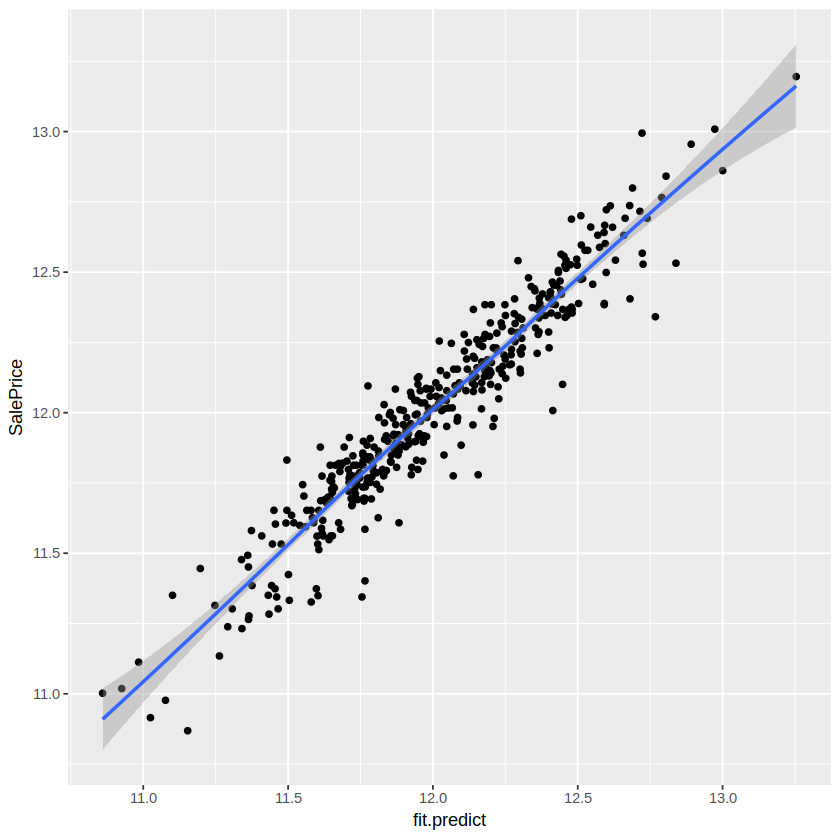

In [14]:
ggplot(validation, aes(x = fit.predict, y = SalePrice)) +
    geom_point() +
    geom_smooth(method = "loess")

In [15]:
fit.test.predict <- predict(fit, clear_test)
test$SalePrice <- exp(fit.test.predict) - 1 # exponential transformation

In [16]:
submission <- test %>% select(Id, SalePrice)
write.csv(submission, './data/submission.csv', row.names = F)

*Your submission scored 0.13087, which is an improvement of your previous score of 0.13173*